# Local Understanding of the Freedom to Vote in Africa 

#### By Tate Barend 
#### DIG HUM 101 
#### July 1st, 2020

## Why Africa? 


 Post World War Two, the chains of colonialism were supposedly taken off. Allowing for the continent to try to create its own path. However, that was untrue, as Africa became home to international proxy wars, corporate natural resources extraction, debt trap and so on. Africa has not been given a fair shot, it is a  continent of incredibly diverse culture, the beginning of human history, and natural beauty. That has been plundered by outsiders. This is what my project is interested in is trying to understand the local perception of their government. After studying in China, I am devoted to trying to understand and make democratic institutions more inclusive, representative, and accountable to the people. 

The research question is; Does the local perception of how free their social and political interaction is, actually correlate to how their government rules?  Data will allow for a deeper dive into the understanding of the relationship between governments and their citizens.



## Data Scources  
- __Afrobarometer__ was founded in 1999 as a locally driven, nonpartisan NGO that seeks to gather data on African’s public attitude surveys on “democracy, governance, the economy, and society". 
- Internationally recognized for having the most constant and accurate surveys. 
    
- __The Freedom House__ was established in 1941 to champion the advancement of freedom globally, and since 1972 the institutes have released the  “Freedom in the World [...] annual report, assessing the condition of political rights and civil liberties around the world.” The most cited index on Democarcy and freedom in the  world. 
- The report is created by a team of in-house and external analysts and expert advisers from the academic, think tank, and human rights communities. The current 2020 edition used  125 analysts, and 40 advisers.

#### Freedom in Africa, 2015
We can see that Freedom Clusters. 
<img src="files/freedom-africa-2015.png" alt="Image" height= "300" width= "450" />

## Methodology 

We will look at the local polling data and use the _Freedom in the world_ index.

#### Local:  __Afrobarometer__
 I will use three rounds of polling, the years: ‘2008-2009’, ‘2011 - 2013’, and ‘2014-2015’.  While focusing on the question _“In this country, how free are you: To choose who to vote for without feeling pressured?”_ interviewees are give five response catorgies:
    1. Not at all free
    2. Not very free
    3. Somewhat free
    4. Completely free
    5. Don't know
    
#### International: __The Freedom House__

Freedom House has three catorgories of Freedom:
    1. Free 
    2. Partly Free 
    3. Not Free
 
 Weighted in Political Rights score, on a scale of 0–40, and its aggregate Civil Liberties score, on a scale of 0–60; totalling a 100 point scale: 

<img src="files/Freedom House score.jpg" alt="Image" height= "300" width= "450" />

 
#### Contries  

__Ghana__: Is the headquarters of __Afrobarometer__ and argubly the freest and most democratic country in Africa.

__Nigirea__: Is the largest country on the continent, oil rich, give and flow on freedom. Re-elected a Miltary Dicatior as presdeint, maybe he has changed?????

__Uganda__: Is the least free country that __Afrobarometer__ has consistent data on.

<img src="files/Africa layout.png" alt="Image" height="450" width="500" />








In [268]:
import math
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
%matplotlib inline


In [211]:
%pwd


'C:\\Users\\taten\\Desktop\\Digtal Hum\\Dig-Hum-Project-\\Individual Project Folder'

In [213]:
%ls


 Volume in drive C has no label.
 Volume Serial Number is 9022-D8D4

 Directory of C:\Users\taten\Desktop\Digtal Hum\Dig-Hum-Project-\Individual Project Folder

07/01/2020  08:36 AM    <DIR>          .
07/01/2020  08:36 AM    <DIR>          ..
06/25/2020  12:40 PM    <DIR>          .ipynb_checkpoints
06/29/2020  09:44 PM         1,588,352 Africa layout.png
06/24/2020  08:50 PM           134,086 Afrobarometer_ data_Freedom_to_choose_who_to_vote_for.xlsx
06/24/2020  08:51 PM           134,082 Afrobarometer_data_Freedom_to_join_any_political_organizations.xlsx
06/24/2020  08:50 PM           134,285 Afrobarometer_data_Freedom_to_say_what_you_think.xlsx
06/30/2020  11:41 PM           619,268 Freedom House score.jpg
06/25/2020  12:39 PM               849 Freedom to join any political organizations_Data.csv
06/24/2020  08:49 PM           290,920 Freedom_House_data_2020_Aggregate_Category_and_Subcategory_Scores_FIW_2003-2020.xlsx
06/30/2020  10:51 PM               232 Freedom_organizations_Dat

In [225]:
free_vote = pd.read_csv("Freedom_vote_all­­.csv")

free_vote.rename(columns = {'Round 6 \n':'Round 6'}, inplace = True)

print(free_vote)

    Country         Response   Round 4   Round 5   Round 6  Freedom Index 
0      Ghana  Not at all free     0.016     0.006    0.017               1
1      Ghana    Not very free     0.017     0.018    0.026               1
2      Ghana    Somewhat free     0.072     0.097    0.104               1
3      Ghana  Completely free     0.874     0.872    0.843               1
4      Ghana       Don't know     0.021     0.008    0.010               1
5   Nigeria   Not at all free     0.101     0.059    0.070               0
6   Nigeria     Not very free     0.187     0.124    0.169               0
7   Nigeria     Somewhat free     0.245     0.316    0.296               0
8   Nigeria   Completely free     0.417     0.491    0.451               0
9   Nigeria        Don't know     0.050     0.010    0.015               0
10    Uganda  Not at all free     0.026     0.043    0.020               0
11    Uganda    Not very free     0.097     0.083    0.049               0
12    Uganda    Somewhat 

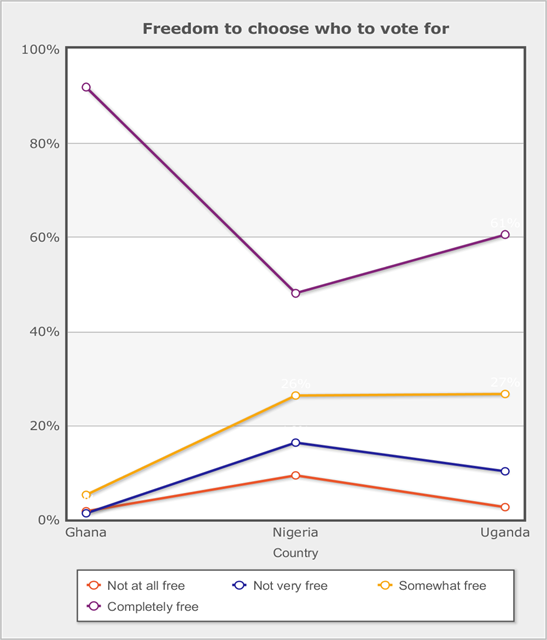

In [216]:
free_vote.head()

,Country,Response,Round 4,Round 5,Round 6,Freedom Index
0,Ghana,Not at all free,0.016,0.006,0.017,1
1,Ghana,Not very free,0.017,0.018,0.026,1
2,Ghana,Somewhat free,0.072,0.097,0.104,1
3,Ghana,Completely free,0.874,0.872,0.843,1
4,Ghana,Don't know,0.021,0.008,0.010,1


In [256]:
#response = ["Not at all free","Not very free","Somewhat free","Completely free","Don't know"]
#X = free_vote[response]
#Y = free_vote['Freedom in the world ']

response = ["Round 5 "]
x = np.array(free_vote[response]).reshape(-1,1)
y = np.array(free_vote['Freedom Index ']).reshape(len(free_vote['Freedom Index ']),)
x, y



(array([[0.006],
        [0.018],
        [0.097],
        [0.872],
        [0.008],
        [0.059],
        [0.124],
        [0.316],
        [0.491],
        [0.01 ],
        [0.043],
        [0.083],
        [0.27 ],
        [0.594],
        [0.009]]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [257]:
lr = LogisticRegression(solver = "liblinear")


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 3)

In [259]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [260]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2, 0],
       [3, 0]], dtype=int64)

In [261]:
logistreg = LogisticRegression(solver = "liblinear")
logistreg


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 257.44, 'Predicted label')

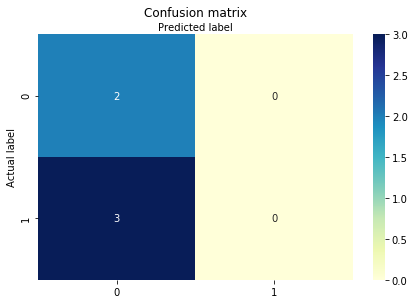

In [265]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

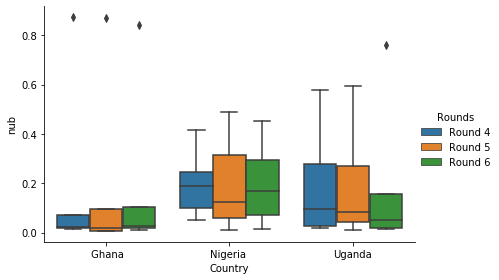

In [305]:
#Data across Rounds
df = pd.DataFrame({'Country': free_vote['Country '],
                    'Round 4': free_vote['Round 4 '],
                    'Round 5': free_vote['Round 5 '],
                    'Round 6': free_vote['Round 6']})
df = df.melt('Country', var_name='Rounds', value_name= "nub")
g = sns.catplot(x="Country", y="nub",
                hue="Rounds",
                data=df, kind="box",
                height=4, aspect=1.5);

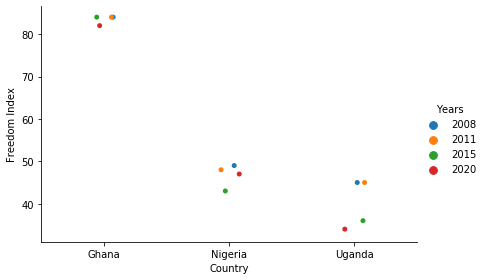

In [306]:
#freedom of the world rating for the three countries
df = pd.DataFrame({'Country': ['Ghana', 'Nigeria', 'Uganda'],
                    '2008': [84, 49, 45],
                    '2011': [84, 48, 45],
                    '2015': [84, 43, 36],
                    '2020': [82, 47, 34]})
df = df.melt('Country', var_name='Years', value_name= "Freedom Index")
g = sns.catplot(x="Country", y="Freedom Index", 
                hue="Years", data=df,
                height=4, aspect=1.5)


# Conculsion

According to __Freedom House__ in 2020, there are only __Seven__ "Free" countries in Africa out of Fifty-Four!

<img src="files/Africa status by year.png" alt="Image" height= "400" width= "550" />

With more work and a better understanding of Coding this project could dig into local understanding of govemrents and showchase the avenues to try to engange citzen  to seek more freedoms. 

#### If we can better understand "the people" , then we can comprehend why Goverments act in the way they do. 

End goal for me is the ability to do research/work around the globe to create inclusive, representative, and accountable goverment instutions. 


